<a href="https://colab.research.google.com/github/afif-af/machine_learning_project/blob/main/ProjectMallCustomerUsingKMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [365]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [366]:
# from google.colab import files
# uploaded = files.upload()

In [367]:
df=pd.read_csv('mall customers.csv')

In [368]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [369]:
df=df.drop('CustomerID',axis=1)

In [370]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [371]:
df.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [372]:
df=df.rename(columns={'Gender':'gender','Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'})

In [373]:
df.describe()

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  200 non-null    object
 1   age     200 non-null    int64 
 2   income  200 non-null    int64 
 3   score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [375]:
df1=df.copy()
df2=df.copy()

In [376]:
df.shape

(200, 4)

Text(0, 0.5, 'income')

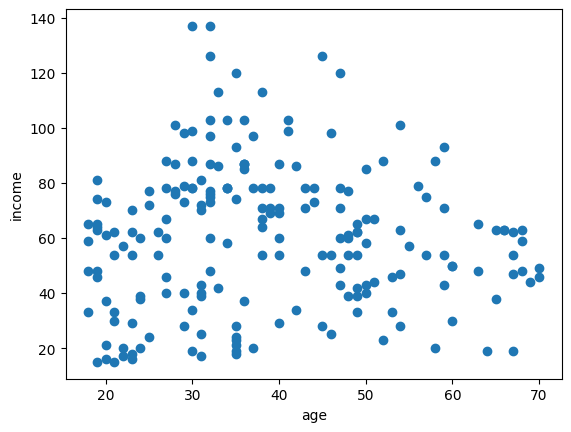

In [377]:
plt.scatter(df.age,df.income)
plt.xlabel('age')
plt.ylabel('income')

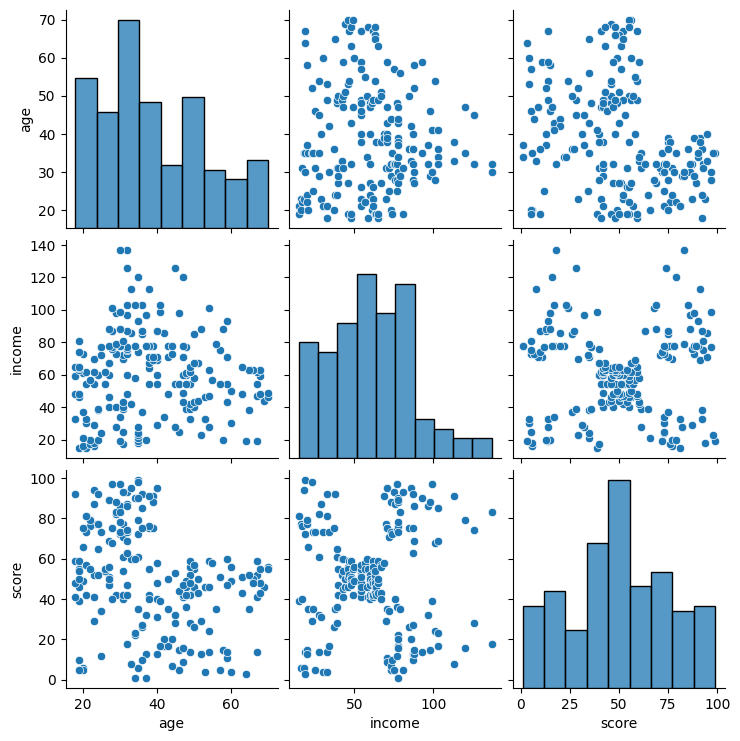

In [378]:
seaborn.pairplot(df)

Text(0, 0.5, 'income')

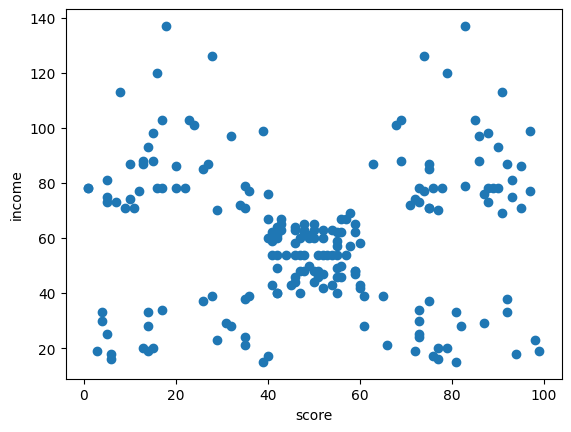

In [379]:
plt.scatter(df.score, df.income)
plt.xlabel('score')
plt.ylabel('income')

In [380]:
from sklearn.cluster import KMeans

In [381]:
km=KMeans(n_clusters=8 )

In [382]:
km.fit(df[['score','income']])

KMeans()

In [383]:
df['new_cluster']=km.predict(df[['score','income']])

In [384]:
df['new_cluster']

,new_cluster
0,3
1,4
2,3
3,4
4,3
...,...
195,7
196,5
197,7
198,5


In [385]:
df

,gender,age,income,score,new_cluster
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3
...,...,...,...,...,...
195,Female,35,120,79,7
196,Female,45,126,28,5
197,Male,32,126,74,7
198,Male,32,137,18,5


In [386]:
df0=df[df.new_cluster==0]
df1=df[df.new_cluster==1]
df2=df[df.new_cluster==2]
df3=df[df.new_cluster==3]
df4=df[df.new_cluster==4]
df5=df[df.new_cluster==5]
df6=df[df.new_cluster==6]
df7=df[df.new_cluster==7]

In [387]:
df6.head()

,gender,age,income,score,new_cluster
89,Female,50,58,46,6
90,Female,68,59,55,6
91,Male,18,59,41,6
92,Male,48,60,49,6
93,Female,40,60,40,6


In [388]:
df0.head()

,gender,age,income,score,new_cluster
123,Male,39,69,91,0
125,Female,31,70,77,0
127,Male,40,71,95,0
129,Male,38,71,75,0
131,Male,39,71,75,0


In [389]:
df0.shape

(32, 5)

In [390]:
center1=km.cluster_centers_
center1

array([[ 82.9375    ,  80.375     ],
       [ 50.82978723,  47.72340426],
       [ 12.68181818,  80.18181818],
       [ 19.52380952,  25.14285714],
       [ 80.04761905,  25.0952381 ],
       [ 22.        , 109.7       ],
       [ 46.45      ,  64.45      ],
       [ 78.42857143, 114.71428571]])

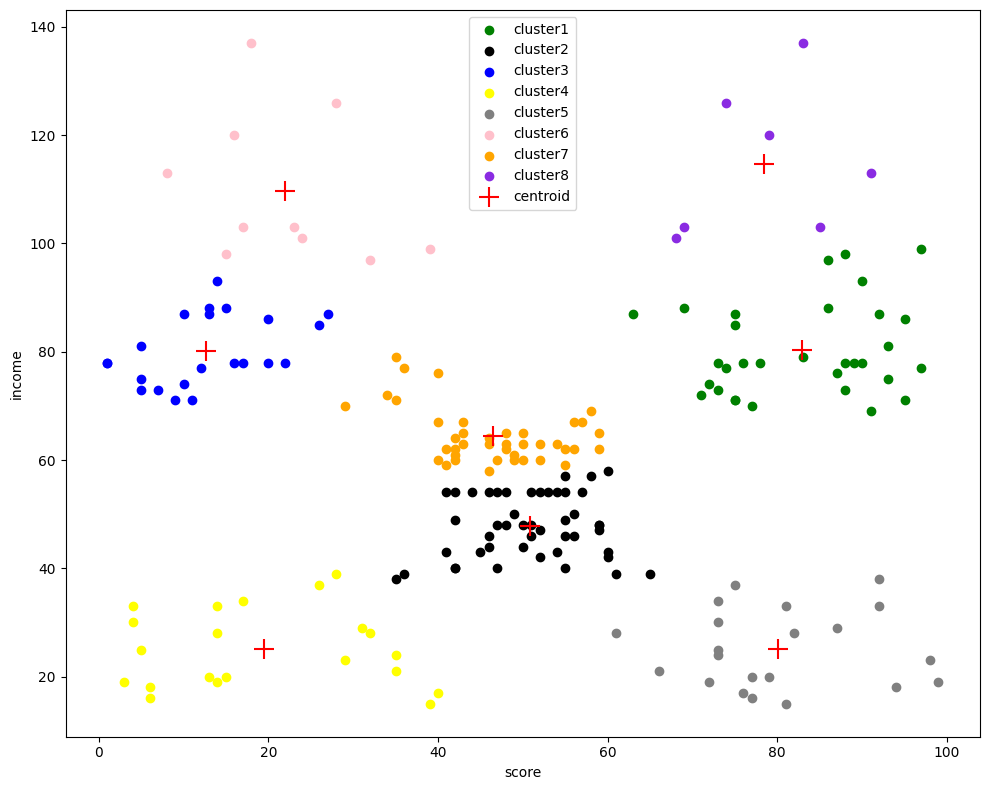

In [391]:
plt.figure(figsize=(10,8))


plt.scatter(df0.score,df0.income,color='green',label='cluster1')
plt.scatter(df1.score,df1.income,color='black',label='cluster2')
plt.scatter(df2.score,df2.income,color='blue',label='cluster3')
plt.scatter(df3.score,df3.income,color='yellow',label='cluster4')
plt.scatter(df4.score,df4.income,color='gray',label='cluster5')
plt.scatter(df5.score,df5.income,color='pink',label='cluster6')
plt.scatter(df6.score,df6.income,color='orange',label='cluster7')
plt.scatter(df7.score,df7.income,color='BlueViolet',label='cluster8')

plt.scatter(center1[:,0], center1[:,1],color='red',label='centroid',
            marker='+',s=200)


plt.xlabel('score')
plt.ylabel('income')
plt.legend(loc='best')




plt.tight_layout()
plt.show()



In [392]:
wcss=[]
cluster_range=range(1,15)
for k in cluster_range:
  km2=KMeans(n_clusters=k)
  km2.fit(df[['score','income']])
  wcss.append(km2.inertia_)


In [393]:
wcss

[269981.28000000014,
 183257.8615446179,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37239.83554245604,
 31280.903845940906,
 31050.500271950274,
 22225.44886242279,
 20614.67173446708,
 18502.100508604704,
 17149.64012392836,
 15659.893844678,
 13595.953224241466]

Text(0, 0.5, 'wcss')

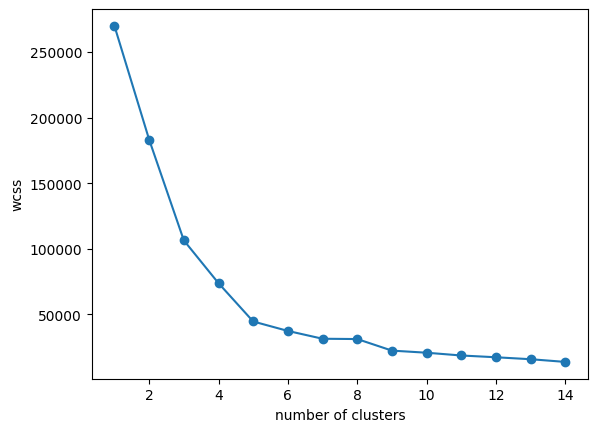

In [394]:
plt.plot(range(1,15), wcss,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('wcss')

In [395]:
from kneed import KneeLocator
kn=KneeLocator(range(1,15),wcss,curve='convex',direction='decreasing')

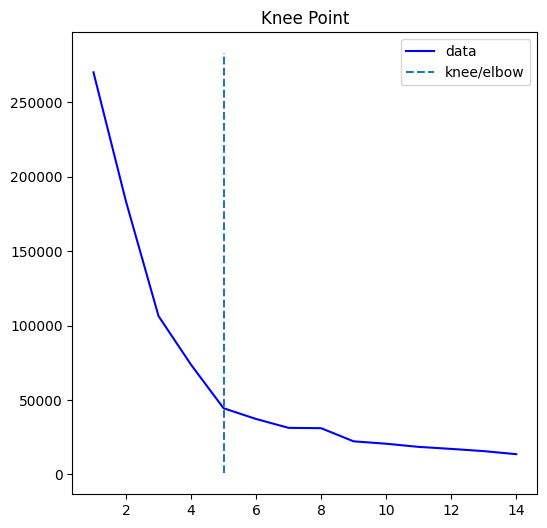

In [396]:
kn.plot_knee()

In [397]:
kn.knee

np.int64(5)

In [398]:
km=KMeans(n_clusters=5)
km.fit(df[['score','income']])


KMeans(n_clusters=5)

In [399]:
df['optimized_clusters']=km.predict(df[['score','income']])

In [400]:
df['optimized_clusters'].head()

,optimized_clusters
0,3
1,4
2,3
3,4
4,3


In [401]:
center2=km.cluster_centers_
center2

array([[82.12820513, 86.53846154],
       [49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783],
       [79.36363636, 25.72727273]])

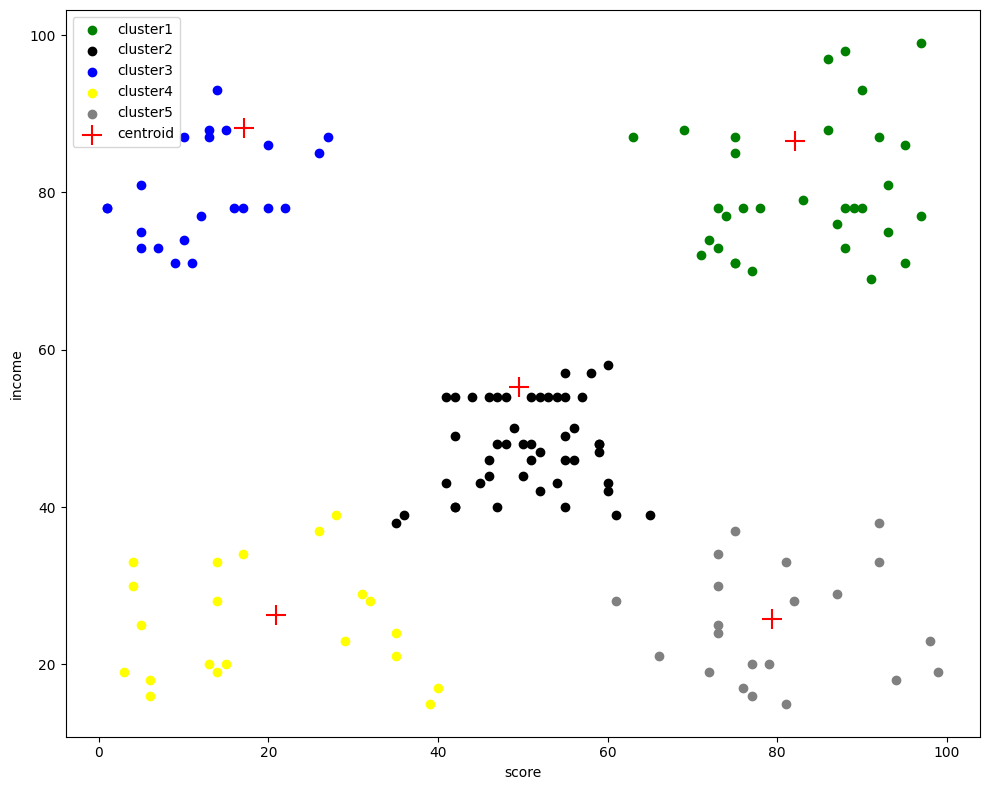

In [402]:
df00=df[df.new_cluster==0]
df10=df[df.new_cluster==1]
df20=df[df.new_cluster==2]
df30=df[df.new_cluster==3]
df40=df[df.new_cluster==4]


plt.figure(figsize=(10,8))


plt.scatter(df00.score,df00.income,color='green',label='cluster1')
plt.scatter(df10.score,df10.income,color='black',label='cluster2')
plt.scatter(df20.score,df20.income,color='blue',label='cluster3')
plt.scatter(df30.score,df30.income,color='yellow',label='cluster4')
plt.scatter(df40.score,df40.income,color='gray',label='cluster5')


plt.scatter(center2[:,0], center2[:,1],color='red',label='centroid',
            marker='+',s=200)


plt.xlabel('score')
plt.ylabel('income')
plt.legend(loc='best')




plt.tight_layout()
plt.show()
